# ESQUEMAS DE MODULAÇÃO DIGITAL

# SUMÁRIO

1. [Métodos de Modulação sem Memória](Memoryless)

2. [Esquemas de Sinalização com Memória](Memory)

3. [Espectro de Potência de Sinais Modulados Digitalmente](PowerSpectrum)




## 3. Espectro de PotÊncia de Sinais Modulados Digitalmente

Nesta seção, será esutdado o cálculo de espectro de sinais modulados digitalmente com memória. Esse estudo é importante para determinar a banda necessária para a transmissão desses sinais e para saber a sua eficiência espectral. A priori, abordaremos o caso em que o sina a ser transmitido pode depender de todo o histórico de transmissão até o momento. A posteriori, trateremos dos casos em que o sistema posui uma memória finita, dos casos de modulação linear, e dos casos onde a modulação pode ser determinada por um espaço de estados de uma cadeia de Markov. Concluiremos a seção com o estudo dos casos de modulação de fase constante(CPM)

### 3.1 Densidade Espectral de Potência de Sistemas Modulados Digitalmente com Memória

Consideremos um sinal modulado $v(t)$ possui um equivalente passa baixa $v_l(t)$ dado por:
$$
v_l(t) = \sum_{n = -\infty}^\infty s_l(t-nT, I_n) \tag{3.1}
$$
Onde $s_l(t, I_n)$ representa um dos M possíves sinais equivalentes passa-baixa, determinados pela sequência de informações em $n$ $I_n$, que é um processo estacionário. Para obter a densidade espectral de potência do sinal de RF, devemos primeiro encontrar  a densidade espectral de potência do equivalente passa-baixa. Assim, determinemos primeiramente a função de autocorrelação desse sinal:

\begin{align}
R_{v_l}(t + \tau, t) &= \mathbb{E} \left[ v_l(t + \tau)\,v_l^*(t) \right] \nonumber \\
&= \sum_{n=-\infty}^{\infty} \sum_{m=-\infty}^{\infty}
\mathbb{E} \left[ s_l(t + \tau - nT;\, I_n)\, s_l^*(t - mT;\, I_m) \right] \tag{3.2}
\end{align}


Uma vez que $v_l(t)$ é um processo cicloestacionário, devemos calcular uma média de sua autocorrelação em um preíodo T. Assim, escrevemos:

$$
\bar{R}_{v_l}(\tau) = \frac{1}{T} \sum_{k=-\infty}^{\infty} \sum_{m=-\infty}^{\infty}
\int_{0}^{T} \mathbb{E} \left[ s_l(t + \tau - mT - kT; I_{m+k})\,
s_l^*(t - mT; I_m) \right] dt 
$$

$$
{=} \frac{1}{T} \sum_{k=-\infty}^{\infty} \sum_{m=-\infty}^{\infty}
\int_{-mT}^{-(m-1)T} \mathbb{E} \left[ s_l(u + \tau - kT; I_k)\,
s_l^*(u; I_0) \right] du
$$

$$
= \frac{1}{T} \sum_{k=-\infty}^{\infty} \int_{-\infty}^{\infty}
\mathbb{E} \left[ s_l(u + \tau - kT; I_k)\,
s_l^*(u; I_0) \right] du \tag{3.3}
$$

Definindo a função $g_k(\tau)$ como sendo a função de autocorrelação cruzada entre os k-ésimo e primeiro sinais em banda base, ou seja:

$$
g_k(\tau) = \int_{-\infty}^{\infty}E[s_l(t+\tau, I_k)s_l^*(t, I_0)] \tag{3.4}
$$

podemos escrever a densidade espectral de potência do sinal equivalente passa-baixo $S_{vl}(f)$ como sendo:

$$
S_{v_l}(f) = \frac{1}{T} \,\mathcal{F} \left[ \sum_{k=-\infty}^{\infty} g_k(\tau - kT) \right]
$$

$$
= \frac{1}{T} \sum_{k=-\infty}^{\infty} G_k(f) \,e^{-j2\pi k f T} \tag{3.5}
$$


Em que $G_{k}(f)$ é a transformada de Fourier da função $g_k(t)$. Espanindo a função $G_k(t)$, e após algum algebrismo, podemos reescrevê-la como:

$$
G_k(f) = E[S_l(f, I_k)S_l^*(f, I_0)] \tag{3.6}
$$

Em que $S_l(f, I_k)$ e $S_l(F, I_0)$ são as transformadas de Fourier de $s_l(t, I_k)$ e $s_l(t, I_0)$, respectivamente.

Se definirmos $G+k(f)' = G_k(f)-G_0(f)$, podemos reescrever s equação para o espectro de $v_l$ como:

$$
S_{v_l}(f) = \frac{1}{T} \sum_{k=-\infty}^{\infty} \left( G_k(f) - G_0(f) \right) e^{-j2\pi k f T}
+ \frac{1}{T} \sum_{k=-\infty}^{\infty} G_0(f) e^{-j2\pi k f T}
$$

$$
= \frac{1}{T} \sum_{k=-\infty}^{\infty} G'_k(f) \,e^{-j2\pi k f T}
+ \frac{1}{T^2} \sum_{k=-\infty}^{\infty} G_0(f)\, \delta \left( f - \frac{k}{T} \right) \tag{3.7}
$$

$$
= \frac{2}{T} \,\Re \left[ \sum_{k=1}^{\infty} G'_k(f) \,e^{-j2\pi k f T} \right]
+ \frac{1}{T^2} \sum_{k=-\infty}^{\infty} G_0 \left( \frac{k}{T} \right) \delta \left( f - \frac{k}{T} \right)
$$

Note que o espectro do sinal possui duas componentes, uma contínua e uma discreta em frequência
### Exemplo 3.1

O exemplo abaixo ilustra o comportamento do espectro  de um sinal modulado digitalmente com memória


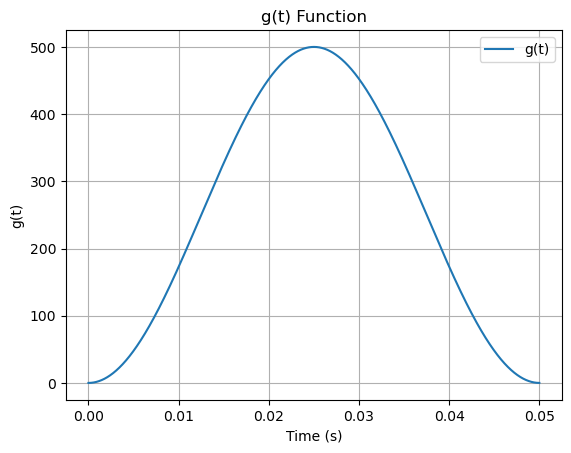

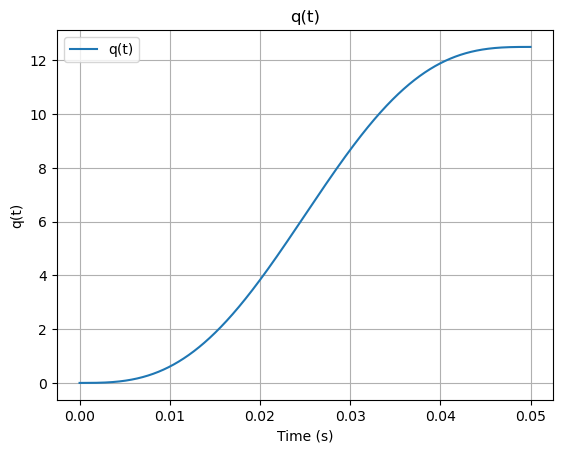

In [18]:
import numpy as np
from scipy.integrate import cumulative_trapezoid as cumtrapz
from matplotlib import pyplot as plt

N = 100
f_s = 10**5
T = N/f_s
L = 2
size_message = 50
message = np.random.choice([-1, 1], size=size_message)

# Tempo total de tranmissão
t = np.linspace(0, T*size_message, size_message*N, endpoint=False)

#Tempo de pulso
t_2 = np.linspace(0, L*T, size_message*N, endpoint=False)

def LRC(t, T, L):
    """    Function to compute the LRC (Raised Cosine) pulse shape.
    Args:
        t (numpy.ndarray): Time vector.
        T (float): Symbol period.
        L (int): Roll-off factor."""
    
    return np.where((t>= 0) & (t<=L*T), (1/(2*L*T))*(1-np.cos((2*np.pi * t)/(L*T))), 0)

'''
for k in range(size_message):
    g_t = LRC(t - k*T, T, L)
    q_t = cumtrapz(g_t, dx=1/f_s, initial=0)
'''
g_t = LRC(t_2, T, L)
q_t = cumtrapz(g_t, dx=1/f_s, initial=0)

plt.plot(t, g_t, label='g(t)')
plt.title('g(t) Function')
plt.xlabel('Time (s)')
plt.ylabel('g(t)')
plt.legend()
plt.grid()
plt.show()

plt.plot(t, q_t, label='q(t)')
plt.title('q(t)')
plt.xlabel('Time (s)')
plt.ylabel('q(t)')
plt.legend()
plt.grid()
plt.show()




